In [1]:
import numpy as np
from scipy.stats import expon, chi2
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.rcParams['font.family'] = 'serif'
mlp.rcParams['font.size'] = 16

In [2]:
data = [
    1.88, 0.54, 1.90, 0.15, 0.02, 2.81, 1.50, 0.53, 2.62, 2.67, 
    3.53, 0.53, 1.80, 0.79, 0.21, 0.80, 0.26, 0.63, 0.36, 2.03, 
    1.42, 1.28, 0.82, 2.16, 0.05, 0.04, 1.49, 0.66, 2.03, 1.00, 
    0.39, 0.34, 0.01, 0.10, 1.10, 0.24, 0.26, 0.45, 0.17, 4.29, 
    0.80, 5.50, 4.91, 0.35, 0.36, 0.90, 1.03, 1.73, 0.38, 0.48,
]
n = len(data)
# H_0: data is sampled from exp(lamda)
lamda = 1/np.mean(data)

# number of parameters in exponential
s = 1

In [3]:
def verify_dist(data, k, s, alpha):
    
    p = 1/k

    theoretical_counts = [n*p for _ in range(k)]
    empirical_counts   = [0   for _ in range(k)]
    for x in data:
        cdf = expon.cdf(x, scale=1/lamda)
        empirical_counts[min(int(cdf*k), k-1)] += 1
    
    # chi-square distribution degrees of freedom
    df = k-s-1

    # chi-square statistic
    statistic = sum((
        (N_j - np_j)**2 / np_j
        for N_j, np_j in zip(empirical_counts, theoretical_counts)
    ))

    # percentile point corresponding to test against
    pp = chi2.ppf(1-alpha, df)

    return statistic, pp

In [4]:
# intervals to split the data into
k = 6
# chi-square test significance level 
alpha = 0.05

statistic, pp = verify_dist(data, k, s, alpha)

tab = '    '
print(
    f'k = {k}:',
    f'chi-square statistic = {statistic:.6f}',
    f'ppf({1-alpha}, df={k-s-1}) = {pp:.6f}', 
    sep=f'\n{tab}', end=f'\n{tab}'
)
if statistic > pp:
    print('Reject H_0')
else:
    print('Failed to reject H_0')

k = 6:
    chi-square statistic = 2.800000
    ppf(0.95, df=4) = 9.487729
    Failed to reject H_0


In [5]:
ks, statistics, pps = list(), list(), list()

for k in range(5, 11):

    statistic, pp = verify_dist(data, k, s, alpha)
    ks.append(k); statistics.append(statistic); pps.append(pp)

df = pd.DataFrame(index=ks, data={
    'chi2 statistic': statistics,
    f'ppf({1-alpha}, df=k-{s+1})': pps
})
df.index.rename('k', inplace=True)
df.loc[:, 'Reject H_0?'] = ['Yes' if reject else 'No' for reject in df.iloc[:, 0] > df.iloc[:, 1]]

df

,chi2 statistic,"ppf(0.95, df=k-2)",Reject H_0?
k,,,
5,0.60,7.814728,No
6,2.80,9.487729,No
7,1.52,11.070498,No
8,4.08,12.591587,No
9,1.84,14.067140,No
10,2.80,15.507313,No


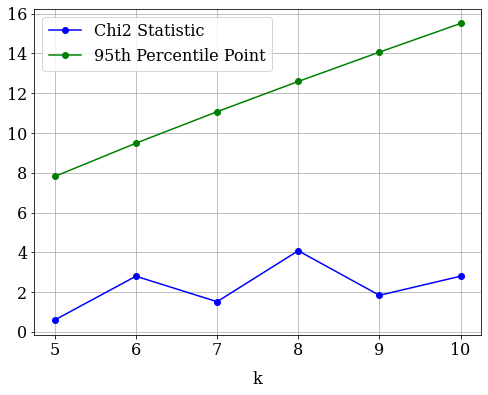

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ks, statistics, color='b', marker='o', label='Chi2 Statistic')
plt.plot(ks, pps, color='g', marker='o', label=f'{int((1-alpha)*100)}th Percentile Point')
plt.xlabel('k', labelpad=12)
plt.grid()
plt.legend()
plt.show()